In [1]:
def fouryravg(path, var, startyr,grid,mask, kappa=False, path2 = None ,dim2=None):
    '''
    Calculates 4 year averages for a given variable
    path, var, grid (gridT, nsquare), are strings
    startyr is int 2002-2012
    '''
    count = 0
    nrows = 800
    ncols = 544
    nvert = 50
    
    if dim2 != None:
        
        avg_var = np.zeros((800,544),dtype=float)
        for year in range(startyr, startyr+4):

            filename = glob.glob(path+'y'+str(year)+'m??d??_'+grid+'.nc')

            for f in np.arange(0,len(filename)):
                tracer = nc.Dataset(filename[f])
                variable = tracer.variables[var]

                if variable.ndim > 2:
                    variable = variable[0,:,:]

                avg_var[:,:] = avg_var[:,:]+variable[:,:]
                count += 1

        avg = count*np.ones((800,544))
        avg_var = ma.array(avg_var/avg,mask=(mask[0,:,:]-1)*-1)

        

        if path2 != None:
            netfile = Dataset(path2+str(startyr)+'-'+str(startyr+4)+'avg_'+var+'.nc', 'w', format='NETCDF3_64BIT')
            print(path2+str(startyr)+'-'+str(startyr+4)+'avg_'+var+'.nc')
        else:
            netfile = Dataset(path+str(startyr)+'-'+str(startyr+4)+'avg_'+var+'.nc', 'w', format='NETCDF3_64BIT')
            print(path+str(startyr)+'-'+str(startyr+4)+'avg_'+var+'.nc')

        netfile.createDimension('x', nrows)
        netfile.createDimension('y', ncols)
        new_var = netfile.createVariable(var+'four', 'f8', ('x', 'y'))
        new_var[:,:] = avg_var[:,:]
        netfile.close()
        
    
    else:
        avg_var = np.zeros((50,800,544),dtype=float)
        for year in range(startyr, startyr+4):

            filename = glob.glob(path+'y'+str(year)+'m??d??_'+grid+'.nc')

            for f in np.arange(0,len(filename)):
                tracer = nc.Dataset(filename[f])
                variable = tracer.variables[var]

                if variable.ndim > 3:
                    variable = variable[0,:,:,:]

                avg_var[:,:,:] = avg_var[:,:,:]+variable[:,:,:]
                count += 1

        avg = count*np.ones((50,800,544))
        avg_var = ma.array(avg_var/avg,mask=(mask-1)*-1)

        if path2 != None:
            netfile = Dataset(path2+str(startyr)+'-'+str(startyr+4)+'avg_'+var+'.nc', 'w', format='NETCDF3_64BIT')
            print(path2+str(startyr)+'-'+str(startyr+4)+'avg_'+var+'.nc')
        else:
            netfile = Dataset(path+str(startyr)+'-'+str(startyr+4)+'avg_'+var+'.nc', 'w', format='NETCDF3_64BIT')
            print(path+str(startyr)+'-'+str(startyr+4)+'avg_'+var+'.nc')

        netfile.createDimension('x', nrows)
        netfile.createDimension('y', ncols)
        netfile.createDimension('z', nvert)
        new_var = netfile.createVariable(var+'four', 'f8', ('z','x', 'y'))
        new_var[:,:,:] = avg_var[:,:,:]
        netfile.close()
    
    return avg_var

def arith_mean(var, kappa=False):
    var_new = np.zeros((50))

    for k in np.arange(0,len(var[:,0,0])):
        print(k)
        counter = 0.0
        tot = 0.0

        for i in np.arange(0,len(var[0,:,0])):
            for j in np.arange(0,len(var[0,0,:])):
                
                if kappa == True:
                    if ma.is_masked(var[k,i,j]) == False and var[k,i,j]<=10**-2:
                            counter = counter+volume[k,i,j]
                            tot = tot + var[k,i,j]*volume[k,i,j]
                else:
                    if ma.is_masked(var[k,i,j]) == False:
                            counter = counter+volume[k,i,j]
                            tot = tot + var[k,i,j]*volume[k,i,j]

        if counter!= 0:
            var_new[k] = tot/counter
            
    return var_new
def glob_arith_mean(var, kappa = False):
    var = var.flatten()
    vol = volume.flatten()
    var_new = 0.0
    counter = 0
    tot = 0.0
    
    for ii in np.arange(0,len(var)):
        
        if kappa == True:
            if ma.is_masked(var[ii]) == False and var[ii]<=10**-2: 
                counter = counter+vol[ii]
                tot = tot+var[ii]*vol[ii]
        else:
            counter = counter+vol[ii]
            tot = tot+var[ii]*vol[ii]
    var_new = tot/counter
    
    return var_new

def log_mean(var,kappa=False):

    var_new = np.zeros((50))

    for k in np.arange(0,len(var[:,0,0])):
        counter = 0.0
        tot = 0.0

        for i in np.arange(0,len(var[0,:,0])):
            for j in np.arange(0,len(var[0,0,:])):
                
                if kappa == True:
                    if ma.is_masked(var[k,i,j]) == False and var[k,i,j]<=10**-2:
                            counter = counter+volume[k,i,j]
                            tot = tot + np.log(var[k,i,j])*volume[k,i,j]
                else:
                    if ma.is_masked(var[k,i,j]) == False:
                            counter = counter+volume[k,i,j]
                            tot = tot + np.log(var[k,i,j])*volume[k,i,j]

        if counter!= 0:
            var_new[k] = np.exp(tot/counter)
    print('logmean complete')
            
    return var_new

In [2]:
from __future__ import division, print_function

import netCDF4 as nc
import numpy as np

import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import glob
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
from mpl_toolkits import basemap
import warnings
from exceptions import KeyError
from netCDF4 import Dataset
%matplotlib inline

In [3]:
#state locations of output
control = '/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_'
control_storage = '/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_'
stlandj = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_'
polzin  = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_'

In [4]:
mesh = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/mesh_mask_anha4_201509.nc')
mask = mesh.variables['tmask'][0]
mbathy = ma.array(mesh.variables['mbathy'][0],mask=(mask[0,:,:]-1)*-1)
grid = nc.Dataset('/home/jacquielee/data/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy = grid.variables['Bathymetry'][:]
bathy = ma.masked_values(bathy[:],0)

In [5]:
zlevels=mesh.variables['gdept_0'][0]
lat=mesh.variables['nav_lat']
lon=mesh.variables['nav_lon']
e1t= mesh.variables['e1t'][0,:,:]  # dx
e2t= mesh.variables['e2t'][0,:,:]  # dy 
e3t= mesh.variables['e3t'][0,:,:,:]
volume=e1t*e2t*e3t
volume_density = (volume / np.sum(volume))*100

In [6]:
H=zlevels[:]
np.set_printoptions(suppress=True)
print(H[22:])

[  109.7292808    130.66598418   155.85072861   186.12556728   222.47516907
   266.04024908   318.12742659   380.21302111   453.93774517   541.08890874
   643.56684341   763.33305097   902.33931191  1062.43972124  1245.29111236
  1452.25093765  1684.28440079  1941.89340079  2225.07793765  2533.33611236
  2865.70272124  3220.82031191  3597.03205097  3992.48384341  4405.22390874
  4833.29074517  5274.78402111  5727.91642659]


In [7]:
def interpolate_to_T(var):
    '''
    interpolate variable on w grid to T grid
    '''
    var_new = np.zeros_like(var)
    var_new[-1,:,:] = var[-1,:,:]
    #now interpolate
    var_new[0:-1,:,:] = (var[0:-1,:,:]+var[1:,:,:])/2
    
    return var_new


In [13]:
fouryravg(polzin, 'iocetflx', 2012,'icemod',mask,dim2=True)
print('finished')
fouryravg(stlandj, 'iocetflx', 2012,'icemod',mask,dim2=True)
print('finished')
fouryravg(control, 'iocetflx', 2012,'icemod',mask,path2=control_storage,dim2=True)
print('finished')

/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_2012-2016avg_iocetflx.nc
finished
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_2012-2016avg_iocetflx.nc
finished
/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_2012-2016avg_iocetflx.nc
finished


In [ ]:
fouryravg(polzin, 'vozocrtx', 2012,'gridU',mask)
print('finished')
fouryravg(stlandj, 'vozocrtx', 2012,'gridU',mask)
print('finished')
fouryravg(control, 'vozocrtx', 2012,'gridU',mask,path2=control_storage)
print('finished')

In [10]:
fouryravg(polzin, 'vomecrty', 2012,'gridV',mask)
print('finished')
fouryravg(stlandj, 'vomecrty', 2012,'gridV',mask)
print('finished')
fouryravg(control, 'vomecrty', 2012,'gridV',mask,path2=control_storage)
print('finished')

/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_2012-2016avg_vomecrty.nc
finished
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_2012-2016avg_vomecrty.nc
finished
/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_2012-2016avg_vomecrty.nc
finished


In [23]:
fouryravg(polzin, 'sossheig', 2012,'gridT',mask,dim2=True)
print('finished')
fouryravg(stlandj, 'sossheig', 2012,'gridT',mask,dim2=True)
print('finished')
fouryravg(control, 'sossheig', 2012,'gridT',mask,path2=control_storage,dim2=True)
print('finished')

/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_2012-2016avg_sossheig.nc
finished
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_2012-2016avg_sossheig.nc
finished
/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_2012-2016avg_sossheig.nc
finished


In [24]:
fouryravg(polzin, 'iicethic', 2012,'icemod',mask,dim2=True)
print('finished')
fouryravg(stlandj, 'iicethic', 2012,'icemod',mask,dim2=True)
print('finished')
fouryravg(control, 'iicethic', 2012,'icemod',mask,path2=control_storage,dim2=True)
print('finished')

/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_2012-2016avg_iicethic.nc
finished
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_2012-2016avg_iicethic.nc
finished
/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_2012-2016avg_iicethic.nc
finished


In [8]:
# fouryravg(stlandj, 'votemper', 2012,'gridT',mask)
# print('finished')
fouryravg(polzin, 'vosaline', 2012,'gridT',mask)
print('finished')
fouryravg(polzin, 'votemper', 2012,'gridT',mask)
print('finished')
fouryravg(polzin, 'votkeavt', 2012,'gridW',mask,kappa=True)
print('finished')
# fouryravg(stlandj, 'votkeavt', 2012,'gridW',mask,kappa=True)
# print('finished')

/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_2012-2016avg_vosaline.nc
finished
/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_2012-2016avg_votemper.nc
finished
/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_2012-2016avg_votkeavt.nc
finished


In [10]:
# fouryravg(control_storage, 'nsquare', 2012,'nsquare',mask,path2=control_storage)
# print('finished')
fouryravg(polzin, 'nsquare', 2012,'nsquare',mask)
print('finished')
fouryravg(stlandj, 'nsquare', 2012,'nsquare',mask)
print('finished')

/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_2012-2016avg_nsquare.nc
finished
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_2012-2016avg_nsquare.nc
finished


In [30]:
fouryravg(control, 'vosaline', 2012,'gridT',mask,path2=control_storage)
print('finished')
fouryravg(control, 'votemper', 2012,'gridT',mask,path2=control_storage)
print('finished')
fouryravg(control, 'votkeavt', 2012,'gridW',mask,path2=control_storage)
print('finished')

/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_2012-2016avg_vosaline.nc
finished
/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_2012-2016avg_votemper.nc
finished
/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_2012-2016avg_votkeavt.nc
finished


In [10]:
fouryravg(polzin, 'votkeavtidal', 2012,'gridW',mask)
print('finished')
# fouryravg(stlandj, 'votkeavtidal', 2012,'gridW',mask)
# print('finished')

/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_2012-2016avg_votkeavtidal.nc
finished


In [7]:
#csal = ma.array(nc.Dataset(control_storage+'2012-2016avg_vosaline.nc').variables['vosalinefour'],mask=(mask-1)*-1)
#ctemp = ma.array(nc.Dataset(control_storage+'2012-2016avg_votemper.nc').variables['votemperfour'],mask=(mask-1)*-1)
ckappa = ma.array(nc.Dataset(control_storage+'2012-2016avg_votkeavt.nc').variables['votkeavtfour'],mask=(mask-1)*-1)
#psal = ma.array(nc.Dataset(polzin+'2012-2016avg_vosaline.nc').variables['vosalinefour'],mask=(mask-1)*-1)
#ptemp = ma.array(nc.Dataset(polzin+'2012-2016avg_votemper.nc').variables['votemperfour'],mask=(mask-1)*-1)
pkappa = ma.array(nc.Dataset(polzin+'2012-2016avg_votkeavt.nc').variables['votkeavtfour'],mask=(mask-1)*-1)
#sjsal = ma.array(nc.Dataset(stlandj+'2012-2016avg_vosaline.nc').variables['vosalinefour'],mask=(mask-1)*-1)
#sjtemp = ma.array(nc.Dataset(stlandj+'2012-2016avg_votemper.nc').variables['votemperfour'],mask=(mask-1)*-1)
sjkappa = ma.array(nc.Dataset(stlandj+'2012-2016avg_votkeavt.nc').variables['votkeavtfour'],mask=(mask-1)*-1)


In [28]:
# ckap_global = glob_arith_mean(ckappa, kappa=True)
# pkap_global = glob_arith_mean(pkappa, kappa=True)
# sjkap_global = glob_arith_mean(sjkappa, kappa=True)

# print('control',ckap_global,'Polzin', pkap_global,'stlaurent', sjkap_global)

In [8]:
cnsq = ma.array(nc.Dataset(control_storage+'2012-2016avg_nsquare.nc').variables['nsquarefour'],mask=(mask-1)*-1)
pnsq = ma.array(nc.Dataset(polzin+'2012-2016avg_nsquare.nc').variables['nsquarefour'],mask=(mask-1)*-1)
sjnsq = ma.array(nc.Dataset(stlandj+'2012-2016avg_nsquare.nc').variables['nsquarefour'],mask=(mask-1)*-1)

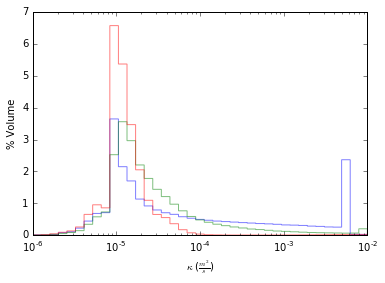

In [19]:
# plt.hist([pkappa_new.flatten(),ckappa_new.flatten()],histtype='step',log=True,bins=np.logspace(-6, -2, 40),
#          alpha=0.5,weights = [volume.flatten(),volume.flatten()],label='control')
n = plt.hist(sjkappa[1:,:,:].flatten(),bins=np.logspace(-6, -2, 40),stacked=True,histtype='step',alpha=0.5,
         label='St Laurent et al.',weights = volume_density[1:,:,:].flatten())
plt.hist(pkappa.flatten(),alpha=0.5,bins=np.logspace(-6, -2, 40),histtype='step',
         label='Polzin',weights = volume_density.flatten())
plt.hist(ckappa.flatten(),alpha=0.5,bins=np.logspace(-6, -2, 40),histtype='step',
         label='control',weights = volume_density.flatten())
plt.gca().set_xscale("log")
# To plot correct percentages in the y axis     
# to_percentage = lambda y, pos: str(round( ( y / float(len(data)) ) * 100.0, 2)) + '%'
# plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percentage))

#plt.title('Vertical Diffusivity')
#plt.legend(loc='upper right')
plt.ylabel('% Volume')
plt.xlabel(r'$\kappa$'+' ('+r'$\frac{m^2}{s}$'+')')
plt.show()

In [9]:
ckap_arctic = log_mean(interpolate_to_T(ckappa[:,400:,:]),kappa=True)
pkap_arctic = log_mean(interpolate_to_T(pkappa[:,400:,:]),kappa=True)
sljkap_arctic = log_mean(interpolate_to_T(sjkappa[:,400:,:]),kappa=True)

ckap_atl = log_mean(interpolate_to_T(ckappa[:,:400,:]),kappa=True)
pkap_atl = log_mean(interpolate_to_T(pkappa[:,:400,:]),kappa=True)
sljkap_atl = log_mean(interpolate_to_T(sjkappa[:,:400,:]),kappa=True)

logmean complete
logmean complete
logmean complete
logmean complete
logmean complete
logmean complete


In [28]:
z = np.arange(0,50)
for h in z[:-8]:
    print(h,ma.count(ckappa[:,400,:][h]))

0 276
1 276
2 276
3 276
4 276
5 276
6 276
7 276
8 276
9 266
10 265
11 263
12 263
13 262
14 259
15 258
16 255
17 250
18 246
19 243
20 241
21 236
22 219
23 208
24 198
25 179
26 170
27 162
28 155
29 150
30 138
31 130
32 112
33 98
34 92
35 88
36 84
37 78
38 71
39 62
40 51
41 33


(5727.9164265927684, 0.49402537319929252)

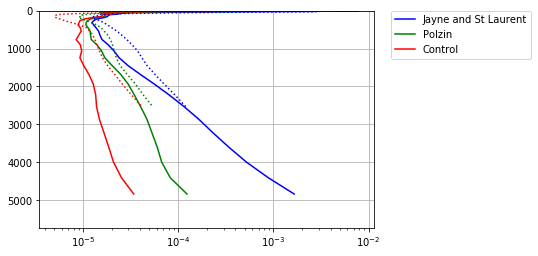

In [10]:
plt.plot(sljkap_atl[:],H[:],color='blue')
plt.plot(pkap_atl[:],H[:],color='green')
plt.plot(ckap_atl[:],H[:],color='red')

plt.plot(sljkap_arctic[:-8],H[:-8],color='blue',linestyle=':')
plt.plot(pkap_arctic[:-8],H[:-8],color='green',linestyle=':')
plt.plot(ckap_arctic[:-8],H[:-8],color='red',linestyle=':')

# plt.plot(kaptidal_glob,H)
# plt.plot(kap2tidal_glob,H)
#plt.title('Domain Average '+r'$\kappa$')
plt.legend([ 'Jayne and St Laurent', 'Polzin','Control'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
#ax.set_title('Turbulent Dissipation Rate',depth[40])
# plt.xlabel(r'$\kappa$'+' ('+r'$\frac{m^2}{s}$'+')')
# plt.ylabel('Depth (m)')
plt.grid()
#plt.xlim([10**-5,10**-4])
plt.ylim(H[-1],H[0])

In [30]:
cnsq_glob = arith_mean(cnsq)
pnsq_glob = arith_mean(pnsq)
sjnsq_glob = arith_mean(sjnsq)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


(5727.9164265927684, 0.49402537319929252)

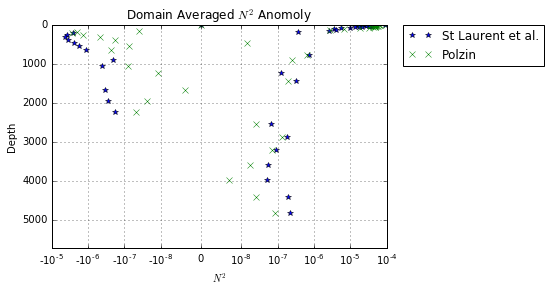

In [29]:
H = zlevels
plt.plot(cnsq_glob[:-2]-sjnsq_glob[:-2],H[:-2],marker='*',linestyle='')
plt.plot(cnsq_glob[:-2]-pnsq_glob[:-2],H[:-2],marker='x',linestyle='')
#plt.plot(sjnsq_glob[:-2]-pnsq_glob[:-2],H[:-2],marker='o',linestyle='')
# plt.plot(kaptidal_glob,H)
# plt.plot(kap2tidal_glob,H)
plt.title('Domain Averaged '+r'$N^2$'+' Anomoly')
plt.legend([ 'St Laurent et al.', 'Polzin'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ticks = [-10**-2, -10**-3, -10**-4, -10**-5,10**-6, 10**-5, 10**-4, 10**-3, 10**-2] 
plt.xscale('symlog',linthreshx=10**-8)
#plt.xscale('log')
ticks = ['-10e-2', '-10e-3', '-10e-4', '-10e-5',
         '+/-10e-6', '10e-5', '10e-4', '10e-3', '10e-2'] 
plt.xlabel(r'$N^2$')
plt.ylabel('Depth')
plt.grid()
#plt.xlim([-10**-4,10**-4])
plt.ylim(H[-1],H[0])

(5727.9164265927684, 0.49402537319929252)

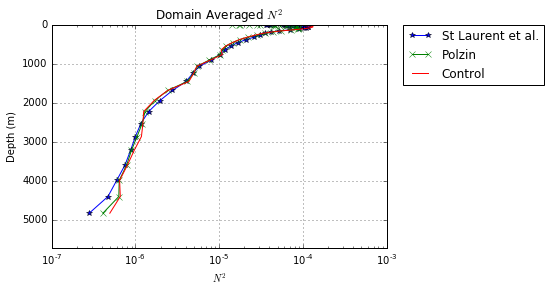

In [31]:
plt.plot(sjnsq_glob[:-2],H[:-2],marker='*')
plt.plot(pnsq_glob[:-2],H[:-2],marker='x')
plt.plot(cnsq_glob[:-2],H[:-2])
# plt.plot(kaptidal_glob,H)
# plt.plot(kap2tidal_glob,H)
plt.title('Domain Averaged '+r'$N^2$')
plt.legend([ 'St Laurent et al.', 'Polzin','Control'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
#ax.set_title('Turbulent Dissipation Rate',depth[40])
#plt.xlabel(r'$\kappa$'+' ('+r'$\frac{m^2}{s}$'+')')
plt.xlabel(r'$N^2$')
plt.ylabel('Depth (m)')
plt.grid()
#plt.xlim([10**-5,10**-4])
plt.ylim(H[-1],H[0])

In [34]:
print(cnsq_glob)

[  0.00000000e+00   1.06449752e-04   7.55877359e-05   5.63709857e-05
   5.20868943e-05   5.52299205e-05   6.37873210e-05   7.53298636e-05
   1.62200594e-04   1.11860588e-04   1.07072782e-04   1.05261402e-04
   1.07920766e-04   1.14105680e-04   1.22587293e-04   1.29318474e-04
   1.32216942e-04   1.32238302e-04   1.31844411e-04   1.28122922e-04
   1.20693751e-04   1.09741826e-04   9.34105285e-05   7.43758928e-05
   5.49608735e-05   4.16592291e-05   3.26730182e-05   2.67912481e-05
   2.15915381e-05   1.73806759e-05   1.45098243e-05   1.20197498e-05
   1.05605991e-05   1.09414795e-05   7.87721385e-06   5.41814084e-06
   4.96547755e-06   4.36030320e-06   2.42765454e-06   1.67687353e-06
   1.25495457e-06   1.22927353e-06   1.18061513e-06   9.67719840e-07
   8.04182336e-07   6.47474432e-07   6.59873795e-07   4.94736865e-07
   1.83389776e-07   0.00000000e+00]


In [ ]:
count = 0
for i in range(0,800):
    for j in range(0,544):
        for k in range(0,50):
            if sjkappa[k,i,j] > 10**-3 and sjkappa[k,i,j] <= 10**-2:
                count = count+1
                print('y',i,'x',j,'z',k)
                
print(count)

y 1 x 233 z 0
y 1 x 233 z 1
y 1 x 233 z 2
y 1 x 233 z 3
y 1 x 233 z 4
y 1 x 233 z 5
y 1 x 233 z 6
y 1 x 233 z 7
y 1 x 233 z 8
y 1 x 233 z 9
y 1 x 233 z 10
y 1 x 233 z 11
y 1 x 234 z 0
y 1 x 235 z 0
y 1 x 235 z 18
y 1 x 235 z 19
y 1 x 235 z 20
y 1 x 235 z 21
y 1 x 235 z 22
y 1 x 235 z 23
y 1 x 235 z 24
y 1 x 235 z 25
y 1 x 235 z 26
y 1 x 235 z 27
y 1 x 235 z 28
y 1 x 235 z 29
y 1 x 235 z 30
y 1 x 235 z 31
y 1 x 235 z 32
y 1 x 235 z 33
y 1 x 236 z 0
y 1 x 236 z 33
y 1 x 236 z 34
y 1 x 236 z 35
y 1 x 236 z 36
y 1 x 237 z 0
y 1 x 237 z 22
y 1 x 237 z 28
y 1 x 237 z 29
y 1 x 237 z 30
y 1 x 237 z 31
y 1 x 237 z 32
y 1 x 237 z 33
y 1 x 237 z 34
y 1 x 237 z 35
y 1 x 237 z 36
y 1 x 238 z 0
y 1 x 238 z 23
y 1 x 238 z 35
y 1 x 238 z 36
y 1 x 239 z 0
y 1 x 239 z 22
y 1 x 239 z 26
y 1 x 239 z 33
y 1 x 239 z 34
y 1 x 240 z 0
y 1 x 240 z 24
y 1 x 240 z 28
y 1 x 240 z 30
y 1 x 241 z 0
y 1 x 241 z 21
y 1 x 241 z 27
y 1 x 241 z 28
y 1 x 241 z 29
y 1 x 241 z 30
y 1 x 241 z 31
y 1 x 242 z 0
y 1 x 242 z 23

In [39]:
# def depth_from_bottom(var):
#     dfb_var = np.zeros_like(var)
#     dfb = np.zeros_like(var)

#     for ii in np.arange(0,len(var[0,:,0])):
#         for jj in np.arange(0,len(var[0,0,:])):
#             dfbcount = 0
#             for kk in np.arange(len(var[:,0,0])-1,-1,-1):
#                 if ma.is_masked(var[kk,ii,jj]):
#                     continue
#                 else:
#                     dfb_var[dfbcount,ii,jj] = var[kk,ii,jj]
#                     if dfbcount == 0:
#                         dfb[kk,ii,jj] = 0.0
#                         bottom = H[kk]
#                     else: 
#                         dfb[dfbcount,ii,jj] = bottom-H[kk]
#                     dfbcount = dfbcount+1
    
#     print('completed')
#     return dfb_var, dfb

def depth_from_bottom(var,depth):
    '''
    params are the 3D variable and the depth of grid cells
    returns the 3D depth from bottom variable and the new 3D grid for DFB metric
    and the furthest from bottom value.
    '''
    
    dfb_var = np.zeros_like(var)
    dfb = np.zeros_like(var)
    DFB = np.zeros((len(var[0,:,0]),len(var[0,0,:])))
    for ii in np.arange(0,len(var[0,:,0])):
        for jj in np.arange(0,len(var[0,0,:])):
            dfbcount = 0
            for kk in np.arange(len(var[:,0,0])-1,-1,-1):
                if ma.is_masked(var[kk,ii,jj]):
                    continue
                    
                else:
                    dfb_var[dfbcount,ii,jj] = var[kk,ii,jj]
                    if dfbcount == 0:
                        dfb[kk,ii,jj] = 0.0
                        DFB[ii,jj] = depth[kk]
                    else: 
                        dfb[dfbcount,ii,jj] = DFB[ii,jj]-depth[kk]
                    dfbcount = dfbcount+1
                    
                    
    print('completed')
    return dfb_var, dfb, DFB
                    
    
def DFB_log_avg(var,DFB, minimum):
    '''
    Variable is 3D and converted to depth from bottom
    DFB is a 2D grid with the depth of the water column
    
    For kappa want to remove values higher than 10**-2
    
    Want to average across similar depths. 
    Specify how many categories the results should be divided into
    '''

    var_new = np.zeros((50))

    for k in np.arange(0,len(var[:,0,0])):
        counter = 0.0
        tot = 0.0

        for i in np.arange(0,len(var[0,:,0])):
            for j in np.arange(0,len(var[0,0,:])):
                
                if DFB[i, j] > minimum:
                
                    if ma.is_masked(var[k,i,j]) == False and var[k,i,j]<=10**-2:
                            counter = counter+volume[k,i,j]
                            tot = tot + np.log(var[k,i,j])*volume[k,i,j]        
                                

        if counter!= 0:
            var_new[k] = np.exp(tot/counter)
    print('logmean complete')
            
    return var_new
def DFB_arith_avg(var,DFB, minimum):
    '''
    Variable is 3D and converted to depth from bottom
    DFB is a 2D grid with the depth of the water column
    
    For kappa want to remove values higher than 10**-2
    
    Want to average across similar depths. 
    Specify how many categories the results should be divided into
    '''

    var_new = np.zeros((50))

    for k in np.arange(0,len(var[:,0,0])):
        counter = 0.0
        tot = 0.0

        for i in np.arange(0,len(var[0,:,0])):
            for j in np.arange(0,len(var[0,0,:])):
                
                if DFB[i, j] > minimum:
                
                    if ma.is_masked(var[k,i,j]) == False:
                            counter = counter+volume[k,i,j]
                            tot = tot + var[k,i,j]*volume[k,i,j]       
                                

        if counter!= 0:
            var_new[k] = tot/counter
    print('arithmean complete')
            
    return var_new


In [9]:
#calculate each grid as a function of depth from bottom
dfb_ckappa, dfbk,DFB = depth_from_bottom(ckappa[:,400:,:],H)
dfb_pkappa, dfbk,DFB = depth_from_bottom(pkappa[:,400:,:],H)
dfb_sjkappa, dfbk,DFB = depth_from_bottom(sjkappa[:,400:,:],H)

completed
completed
completed


In [40]:
#want the basin and the shelves to have separate DFB scalings.
#remove Kappa values that are greater that 10**-2
#Basin will be greater than 1500 DFB
# cdfb_basin = DFB_log_avg(dfb_ckappa, DFB,1500)
# sjdfb_basin = DFB_log_avg(dfb_sjkappa, DFB,1500)
# pdfb_basin = DFB_log_avg(dfb_pkappa, DFB,1500)
dfb_basin = DFB_arith_avg(dfbk,DFB,1500)
#Shelves will be less than 1500m
# cdfb_shelf = DFB_log_avg(dfb_ckappa, DFB,1500)
# sjdfb_shelf = DFB_log_avg(dfb_sjkappa, DFB,1500)
# pdfb_shelf = DFB_log_avg(dfb_pkappa, DFB,1500)
#dfb_shelf = DFB_arith_avg(dfbk,DFB,1500)

arithmean complete


In [16]:
# dfb_clogkap = log_mean(dfb_ckappa, kappa=True)
# dfb_plogkap = log_mean(dfb_pkappa,kappa=True)
# dfb_sjlogkap = log_mean(dfb_sjkappa,kappa=True)
dfb = arith_mean(dfbk)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [36]:
# z= np.arange(0,28)
# for h in z[:]:
#     print(h,ma.count(dfb_ckappa[h,:,:]))
print(dfb_shelf)

[ 0.          0.00000006  0.00000011  0.00000015  0.00000017  0.00000018
  0.00000018  0.00000018  0.00000017  0.00000017  0.00000016  0.00000014
  0.00000013  0.00000011  0.0000001   0.00000009  0.00000008  0.00000007
  0.00000006  0.00000005  0.00000004  0.00000004  0.00000003  0.00000003
  0.00000003  0.00000002  0.00000002  0.00000002  0.00000002  0.00000002
  0.00000002  0.00000002  0.00000002  0.00000001  0.00000001  0.00000001
  0.00000001  0.00000001  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.        ]


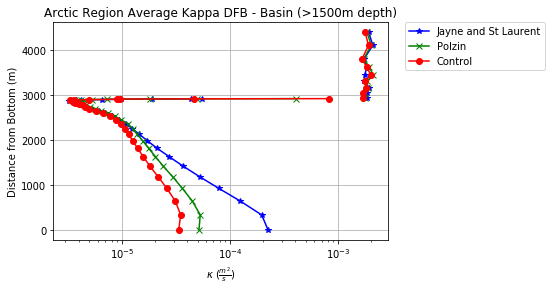

In [43]:
#print(dfb_sjlogkap.shape,dfb.shape)

plt.plot(sjdfb_basin[:-3],dfb_basin[:-3],marker='*',color='blue')
plt.plot(pdfb_basin[:-3],dfb_basin[:-3],marker='x',color='green')
plt.plot(cdfb_basin[:-3],dfb_basin[:-3],marker='o',color='red')
# plt.plot(sjdfb_shelf,dfb_shelf,marker='*',color='blue')
# plt.plot(pdfb_shelf,dfb_shelf,marker='x',color='green')
# plt.plot(cdfb_shelf,dfb_shelf,marker='o',color='red')

# plt.plot(dfb_kappa2[:,100,250],dfbk[:,100,250],marker='*')
# plt.plot(dfb_kappa3[:,100,250],dfbk[:,100,250],marker='*')

plt.title('Arctic Region Average Kappa DFB - Basin (>1500m depth)')
plt.legend([ 'Jayne and St Laurent','Polzin','Control'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
#ax.set_title('Turbulent Dissipation Rate',depth[40])
plt.xlabel(r'$\kappa$'+' ('+r'$\frac{m^2}{s}$'+')')
plt.ylabel('Distance from Bottom (m)')
plt.grid()
#plt.xlim([10**-5,10**-4])
#plt.ylim(H[-1],H[0])

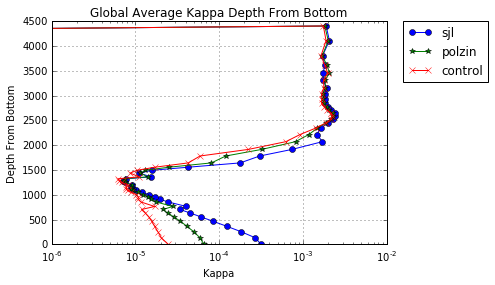

In [44]:
plt.plot(dfb_sjlogkap[:-1],dfb[:-1],marker='o')
plt.plot(dfb_plogkap[:-1],dfb[:-1],marker='*')
plt.plot(dfb_clogkap[:-1],dfb[:-1],marker='x')

# plt.plot(dfb_kappa2[:,100,250],dfbk[:,100,250],marker='*')
# plt.plot(dfb_kappa3[:,100,250],dfbk[:,100,250],marker='*')

plt.title('Global Average Kappa Depth From Bottom')
plt.legend([ 'sjl','polzin','control'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
#ax.set_title('Turbulent Dissipation Rate',depth[40])
plt.xlabel('Kappa')
plt.ylabel('Depth From Bottom')
plt.grid()
#plt.xlim([10**-5,10**-4])
#plt.ylim(H[-1],H[0])

In [8]:
def compute_zonal(kappa,calcKappa=False, zonalmask=False):

    k_zonal = np.zeros((len(kappa[:,0,0]),len(kappa[0,:,0])), dtype='float')
    
    if calcKappa==True:
        for k in np.arange(0,len(kappa[:,0,0])):
            counter = 0.0
            tot = 0.0
            for i in np.arange(0,len(kappa[0,:,0])):
                for j in np.arange(0,len(kappa[0,0,:])):
                    if ma.is_masked(kappa[k,i,j]) == False and kappa[k,i,j]<=10**-2:
                            counter = counter+1
                            tot = tot + kappa[k,i,j]
                if counter!= 0:
                    k_zonal[k,i] = tot/counter
                    
    elif zonalmask==True:
        for k in np.arange(0,len(kappa[:,0,0])):
            for i in np.arange(0,len(kappa[0,:,0])):
                k_zonal[k,i] = np.sum(kappa[k,i,:])/len(kappa[k,i,:])
        
    else:
        for k in np.arange(0,len(kappa[:,0,0])):
            for i in np.arange(0,len(kappa[0,:,0])):
                counter = 0.0
                tot = 0.0
                for j in np.arange(0,len(kappa[0,0,:])):
                    if ma.is_masked(kappa[k,i,j]) == False:
                            counter = counter+1
                            tot = tot + kappa[k,i,j]
                if counter!= 0:

                    k_zonal[k,i] = tot/counter
    print('finished zonal calculation')
    
    return k_zonal

finished zonal calculation


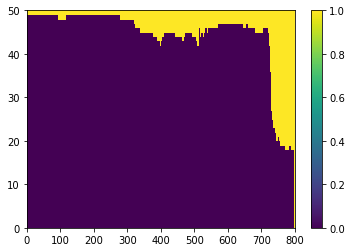

In [9]:
zonal_mask = compute_zonal(mask,zonalmask=True)*(-1)
zonal_mask[zonal_mask[:,:]==0.0]=1
zonal_mask[zonal_mask[:,:]<0.0]=0
z = plt.pcolor(zonal_mask)
plt.colorbar(z)
plt.show()

In [10]:
# csal = ma.array(compute_zonal(csal[:,:,:]),mask=zonal_mask)
# ctemp = ma.array(compute_zonal(ctemp),mask=zonal_mask)
# cnsq = ma.array(compute_zonal(cnsq),mask=zonal_mask)
ckappa = ma.array(compute_zonal(ckappa,calcKappa=True),mask=zonal_mask)
# psal = ma.array(compute_zonal(psal),mask=zonal_mask)
# ptemp = ma.array(compute_zonal(ptemp),mask=zonal_mask)
# pnsq = ma.array(compute_zonal(pnsq),mask=zonal_mask)
pkappa = ma.array(compute_zonal(pkappa,calcKappa=True),mask=zonal_mask)
# sjsal = ma.array(compute_zonal(sjsal),mask=zonal_mask)
# sjtemp = ma.array(compute_zonal(sjtemp),mask=zonal_mask)
# sjnsq = ma.array(compute_zonal(sjnsq),mask=zonal_mask)
sjkappa = ma.array(compute_zonal(sjkappa,calcKappa=True),mask=zonal_mask)

finished zonal calculation
finished zonal calculation
finished zonal calculation


In [11]:
# csal.dump('csal_zonal.npy')
# psal.dump('psal_zonal.npy')
# sjsal.dump('sjsal_zonal.npy')

# ctemp.dump('ctemp_zonal.npy')
# ptemp.dump('ptemp_zonal.npy')
# sjtemp.dump('sjtemp_zonal.npy')

# cnsq.dump('cnsq_zonal.npy')
# pnsq.dump('pnsq_zonal.npy')
# sjnsq.dump('sjnsq_zonal.npy')

ckappa.dump('ckappa_zonal.npy')
pkappa.dump('pkappa_zonal.npy')
sjkappa.dump('sjkappa_zonal.npy')

In [8]:
csal = np.load('csal_zonal.npy')
psal= np.load('psal_zonal.npy')
sjsal= np.load('sjsal_zonal.npy')

ctemp= np.load('ctemp_zonal.npy')
ptemp= np.load('ptemp_zonal.npy')
sjtemp= np.load('sjtemp_zonal.npy')

cnsq= np.load('cnsq_zonal.npy')
pnsq= np.load('pnsq_zonal.npy')
sjnsq= np.load('sjnsq_zonal.npy')

In [9]:
high_lat = ma.array((lat[576,325],lat[200,200]))
high_lon = ma.array((lon[576,325],lon[200,200]))
low_lat = ma.array((lat[700,200],lat[45,410]))
low_lon = ma.array((lon[700,200],lon[45,410]))
labels3 = ['20S', '4N', '28N', '48N', '64N', '77N', '86N', '78N']

In [9]:
E = nc.Dataset('/mnt/storage0/jacquielee/data/E_climatology.nc').variables['E'] 
#h2 = nc.Dataset('/mnt/storage0/jacquielee/data/hsquare.nc').variables['hsquare']

In [1]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,2,1)
m = Basemap(projection='ortho',lon_0=-40,lat_0=40,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
cmap = plt.get_cmap('viridis',25)
x_lons, y_lats = m(lon[:,:],lat[:,:])
mesh = m.pcolor(x_lons[:,:], y_lats[:,:],E[:,:],cmap=cmap,norm=colors.LogNorm(vmin=10**-6,vmax=10**-2))
cb = m.colorbar(mesh)
cb.set_label('E ('+r'$\frac{W}{m^2}$'+')',weight='bold')
#x,y = m(high_lon,high_lat)
#m.scatter(x,y,marker='D',color='w',s=50)

#x,y = m(low_lon,low_lat)
#m.scatter(x,y,marker='*',color='w',s=100)
#location = m.plot(line_lon[::100],line_lat[::100],'o',latlon=True,markersize=10)

# for label, x_coord, y_coord in zip(labels3,location[0].get_xdata()[:],location[0].get_ydata()[:]):
#     ax.annotate(label,(x_coord,y_coord),fontsize=30,color='magenta')
plt.show

NameError: name 'plt' is not defined

                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<function matplotlib.pyplot.show>

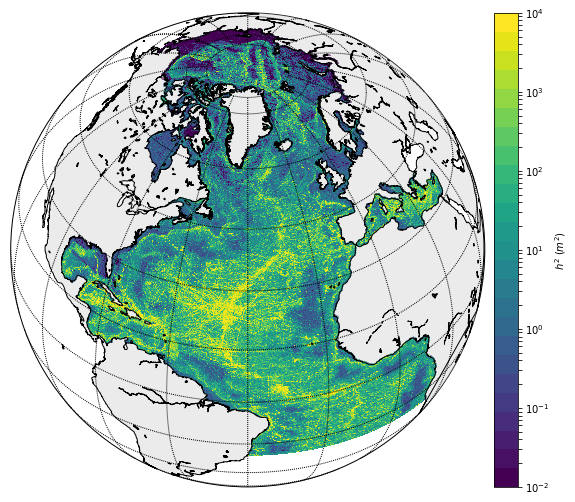

In [26]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,2,1)
m = Basemap(projection='ortho',lon_0=-40,lat_0=40,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
cmap = plt.get_cmap('viridis',25)
x_lons, y_lats = m(lon[:,:],lat[:,:])
mesh = m.pcolor(x_lons[:,:], y_lats[:,:],h2[:,:],cmap=cmap,norm=colors.LogNorm(vmin=10**-2,vmax=10**4))
m.colorbar(mesh,label=r'${h^2}$ ('+r'${m^2}$)')

plt.show

In [9]:
nb = ma.array(nc.Dataset('/mnt/storage0/jacquielee/data/Nb_climatology.nc')['nb'],mask=(mask[0,:,:]-1)*-1)

In [22]:
v = np.where(nb[:,:]>10)
for x in v:
    print(x.shape)

(234275,)
(234275,)


/home/jacquielee/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/jacquielee/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


                Geostationary, Orthographic or Azimuthal equidistant basemap
                

/home/jacquielee/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/jacquielee/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


<function matplotlib.pyplot.show>

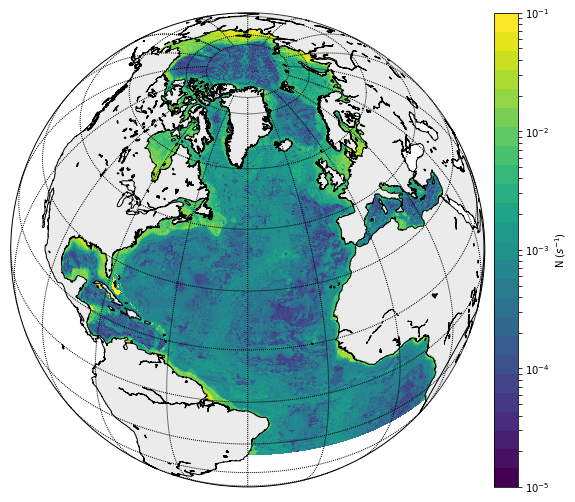

In [23]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,2,1)
m = Basemap(projection='ortho',lon_0=-40,lat_0=40,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
cmap = plt.get_cmap('viridis',25)
x_lons, y_lats = m(lon[:,:],lat[:,:])
mesh = m.pcolor(x_lons[:,:], y_lats[:,:],nb[:,:],cmap=cmap,norm=colors.LogNorm(vmin=10**-5,vmax=10**-1))
m.colorbar(mesh,label='N ('+r'${s^{-1}}$)')

plt.show

In [24]:
import scipy.io as sio
mean_tidal_speed = sio.loadmat('/mnt/storage0/jacquielee/data/TIDAL/mean_tide_speed.mat', 
                       struct_as_record=False, squeeze_me=True)
mean_speed = mean_tidal_speed['mean_speed']
mean_speed = np.nan_to_num(mean_speed)
mean_speed0 = ma.array(mean_speed,mask=(mask[0,:,:]-1)*-1)

                Geostationary, Orthographic or Azimuthal equidistant basemap
                

<function matplotlib.pyplot.show>

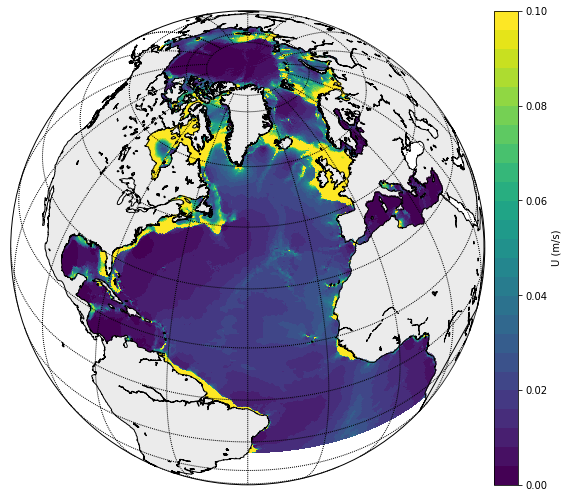

In [26]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,2,1)
m = Basemap(projection='ortho',lon_0=-40,lat_0=40,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
cmap = plt.get_cmap('viridis',25)
x_lons, y_lats = m(lon[:,:],lat[:,:])
mesh = m.pcolor(x_lons[:,:], y_lats[:,:],mean_speed0[:,:],cmap=cmap,vmax=0.10)
m.colorbar(mesh,label='U (m/s)')

plt.show

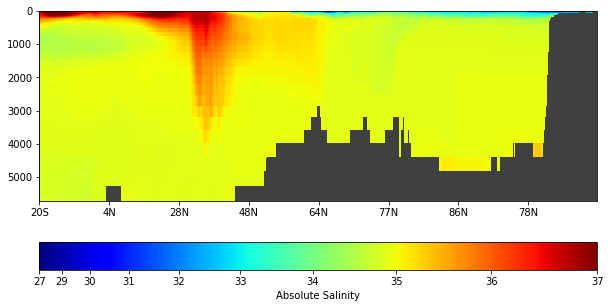

In [49]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) 
x = np.arange(0,800)
y = zlevels[:]
X, Y = np.meshgrid(x[:], y[:])
cmap = plt.get_cmap('jet')
cmap.set_bad('0.25',alpha=None)
norm = colors.PowerNorm(2,vmin=27, vmax=37)
mesh = ax.pcolormesh(X,Y,csal,norm=norm,cmap=cmap)
plt.ylim(zlevels[0],zlevels[-1])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xticklabels(labels3)
ticks = [27,29,30,31,32,33,34,35,36,37]
bar = plt.colorbar(mesh, ticks=ticks,orientation='horizontal' ,label='Absolute Salinity')
# ax[1].pcolor(X,Y,ctemp)
# ax[1].set_ylim(ax[1].get_ylim()[::-1])
# ax[2].pcolor(X,Y,ckappa)
# ax[2].set_ylim(ax[1].get_ylim()[::-1])

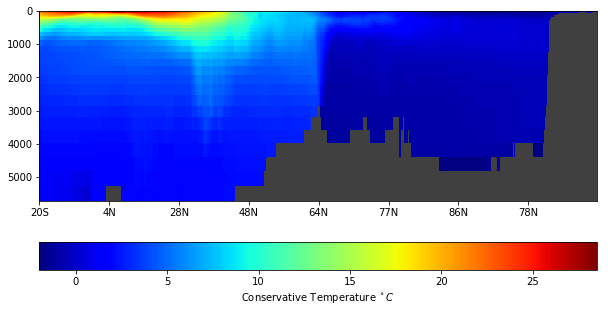

In [50]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) 
x = np.arange(0,800)
y = zlevels[:]
X, Y = np.meshgrid(x[:], y[:])
cmap = plt.get_cmap('jet')
cmap.set_bad('0.25',alpha=None)
norm = colors.PowerNorm(2,vmin=27, vmax=37)
mesh = ax.pcolormesh(X,Y,ctemp,vmin=-2,cmap=cmap)
plt.ylim(zlevels[0],zlevels[-1])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xticklabels(labels3)

#ticks = [27,29,30,31,32,33,34,35,36,37]
bar = plt.colorbar(mesh,orientation='horizontal' ,label='Conservative Temperature'+' '+r'$^\circ C$')

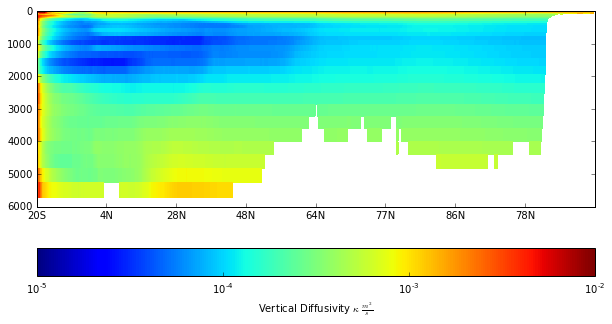

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) 
x = np.arange(0,800)
y = zlevels[:]
X, Y = np.meshgrid(x[:], y[:])
cmap = plt.get_cmap('jet')
cmap.set_bad('0.25')
norm = colors.LogNorm(vmin=10**-5, vmax=10**-2)
mesh = ax.pcolor(X,Y,pkappa,norm=norm)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xticklabels(labels3)
#ticks = [27,29,30,31,32,33,34,35,36,37]
bar = plt.colorbar(mesh,orientation='horizontal' ,label='Vertical Diffusivity'+' '+r'$\kappa$'+' '+r'$\frac{m^2}{s}$')

In [72]:
# cpsdiff = csal-psal
# cssdiff = csal-sjsal
# spsdiff = psal-sjsal

# cptdiff = ma.array(ctemp-ptemp,mask = zonal_mask)
# cstdiff = ctemp-sjtemp
# sptdiff = ptemp-sjtemp

# cpndiff = cnsq-pnsq
# csndiff = cnsq-sjnsq
# spndiff = sjnsq-pnsq

cpkdiff = ckappa-pkappa
cskdiff = ckappa-sjkappa
spkdiff = sjkappa-pkappa

# cpsdiff.dump('cpsdiff.npy')
# cssdiff.dump('cssdiff.npy')
# cptdiff.dump('cptdiff.npy')
# cstdiff.dump('cstdiff.npy')
# spsdiff.dump('spsdiff.npy')
# sptdiff.dump('sptdiff.npy')


In [77]:
# kappa_bounds = np.array([ -10**-3,-10**-4,-10**-5,-10**-6,-10**-7,-10**-8,0.0,10**-8,10**-7,10**-6,10**-5,10**-4,10**-3])
# kappa_labels = [r'${-10^{-3}}$',r'${-10^{-4}}$',r'${-10^{-5}}$',r'${-10^{-6}}$',r'${-10^{-7}}$',r'${-10^{-8}}$','0',
#                 r'${10^{-8}}$',r'${10^{-7}}$',r'${10^{-6}}$',r'${10^{-5}}$',r'${10^{-4}}$',r'${10^{-3}}$']
kappa_bounds = np.array([-10**-2, -10**-3,-10**-4,-10**-5,-10**-6,0.0,10**-6,10**-5,10**-4,10**-3,10**-2])
kappa_labels = [r'${-10^{-2}}$',r'${-10^{-3}}$',r'${-10^{-4}}$',r'${-10^{-5}}$',r'${-10^{-6}}$','0',
                r'${10^{-6}}$',r'${10^{-5}}$',r'${10^{-4}}$',r'${10^{-3}}$',r'${10^{-2}}$']
sal_bounds  = np.array([-1.0,-0.7,-0.4,-0.2,-0.1,-0.05,-0.01,0.0,0.01,0.05,0.1,0.2,0.4,0.7,1.0])

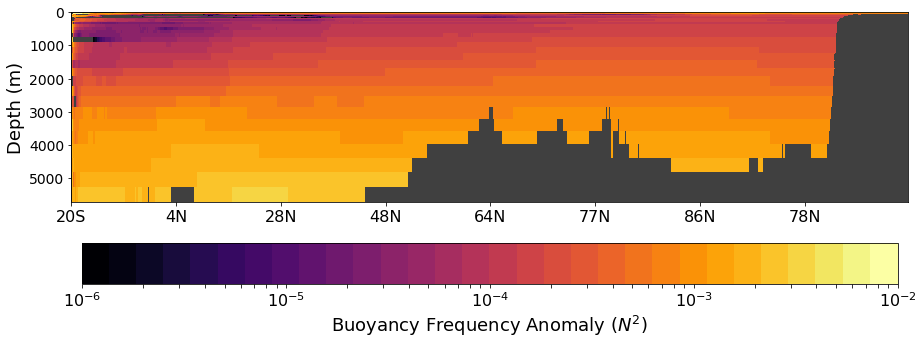

In [83]:
fig, ax = plt.subplots(1,1, figsize=(15,5)) 
x = np.arange(0,800)
y = zlevels[:]
X, Y = np.meshgrid(x[:], y[:])
cmap = plt.get_cmap('inferno',30)
cmap.set_bad('0.25')
cmap.set_over('gray')
#norm = colors.Normalize(vmin=-1, vmax=1)
#norm = mpl.colors.BoundaryNorm(sal_bounds, cmap.N)
norm = colors.LogNorm(vmin=10**-6, vmax=10**-2)
#norm = mpl.colors.BoundaryNorm(kappa_bounds, cmap.N)
mesh = ax.pcolormesh(X,Y,spkdiff,cmap=cmap,norm=norm)
plt.ylim(zlevels[0],zlevels[-1])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xticklabels(labels3,fontsize=16)

ax.set_ylabel('Depth (m)', fontsize=18)
plt.tick_params(axis='y',which='major',labelsize=14)
# ticks = [27,29,30,31,32,33,34,35,36,37]
bar = plt.colorbar(mesh,orientation='horizontal')
#bar = plt.colorbar(mesh,orientation='horizontal' ,ticks=kappa_bounds[:])
#bar.set_ticklabels(kappa_labels)
bar.ax.tick_params(labelsize=16)
label='Buoyancy Frequency Anomaly ('+r'${N^2}$'+')'
#label = '$K_v$'
#label = 'Conservative Temperature Anomaly ($^\circ$C)'
#label = 'Salinity Anomaly (PSU)'
bar.set_label(label,fontsize=18)
bar.update_ticks()

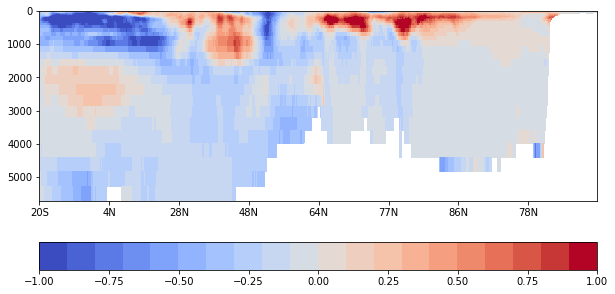

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) 
x = np.arange(0,800)
y = zlevels[:]
X, Y = np.meshgrid(x[:], y[:])
cmap = plt.get_cmap('coolwarm',20)
cmap.set_bad('0.25')
norm = colors.Normalize(vmin=-1, vmax=1)

mesh = ax.pcolor(X,Y,cstdiff,cmap=cmap,norm=norm)
plt.ylim(zlevels[0],zlevels[-1])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xticklabels(labels3)
bar = plt.colorbar(mesh,orientation='horizontal')

In [8]:
sjtide = ma.array(nc.Dataset(stlandj+'2012-2016avg_votkeavtidal.nc').variables['votkeavtidalfour'],mask=(mask-1)*-1)
ptide = ma.array(nc.Dataset(polzin+'2012-2016avg_votkeavtidal.nc').variables['votkeavtidalfour'],mask=(mask-1)*-1)

In [12]:
#Means over the Arctic region only

#print('slj tide',sjtide[:,500:,:])
#print('polzin tide',ptide[:,500:,:])

sjtidemean = log_mean(sjtide[:,400:,:],kappa=True)
ptidemean = log_mean(ptide[:,400:,:],kappa=True)
sjkappamean = log_mean(sjkappa[:,400:,:],kappa=True)
pkappamean = log_mean(pkappa[:,400:,:],kappa=True)
ckappamean = log_mean(ckappa[:,400:,:],kappa=True)

/home/jacquielee/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:141: RuntimeWarning: divide by zero encountered in log


logmean complete
logmean complete
logmean complete
logmean complete
logmean complete


In [32]:
#np.sum(np.sum(sjkappa[:,400:,:],axis=1),axis=1)
for i in range(0,50):
    print(sjkappa[i,400:,:].count())

96334
96334
96334
96334
96334
96334
96334
96334
96334
91885
90767
90164
88923
87630
86523
85340
83648
81112
78197
76262
74505
72801
69403
67029
64578
61366
56724
52867
48981
45749
42971
40907
39526
38442
37451
36446
35232
33698
31727
29466
26735
23414
19798
15781
10998
4088
1248
0
0
0


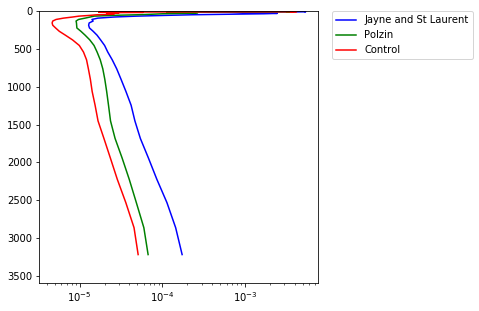

In [32]:
#Arctic log Average plots
fig, ax = plt.subplots(1,1, figsize=(5,5))
H=zlevels

ax.plot(sjkappamean[:-6],zlevels[:-6],label = 'St Laurent and Jayne',color='blue')
ax.plot(pkappamean[:-6],zlevels[:-6],label = 'Polzin',color='green')
ax.plot(ckappamean[:-6],zlevels[:-6],label='Control',color='red')
#ax[0].set_title('Atlantic')

ax.set_xscale('log')
ax.set_ylim(H[-6],H[0])
ax.legend([ 'Jayne and St Laurent', 'Polzin','Control'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [10]:
pnsq_avg = ma.mean(ma.mean(pnsq[:,500:,:],1),1)
sjnsq_avg = ma.mean(ma.mean(sjnsq[:,500:,:],1),1)

NameError: name 'pnsq' is not defined

2.17595450101e-08 0.000183932754376 2.47428039165e-10


Text(0.5,0,u'$K_v (\\frac{m^2}{s})$')

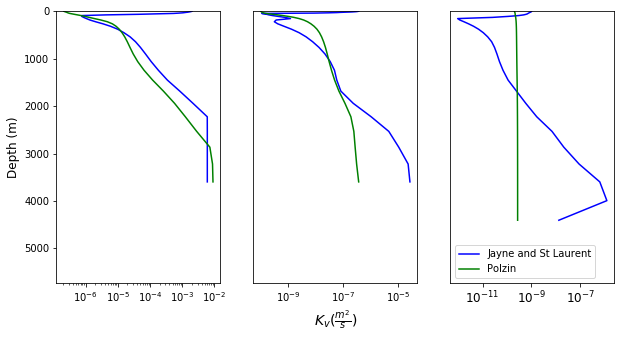

In [28]:
fig, ax = plt.subplots(1,3, figsize=(10,5))
H=zlevels
x = 240
y = 680
ax[1].plot(sjtide[:,y,x],zlevels[:],color='blue')
ax[1].plot(ptide[:,y,x],zlevels[:],color='green')

#ax[0].set_title('Atlantic')

ax[1].set_xscale('log')
ax[1].set_ylim(H[-1],H[0])
plt.xticks(fontsize=12)
x2 = 325
y2 = 576


ax[0].plot(sjtide[:,y2,x2],zlevels[:],color='blue')
ax[0].plot(ptide[:,y2,x2],zlevels[:],color='green')
ax[1].set_yticks([])
#ax[1].set_title('Arctic')
ax[0].set_xscale('log')

ax[0].set_ylim(H[-1],H[0])
ax[0].set_ylabel('Depth (m)', fontsize=12)
#ax[0].set_xticklabels(fontsize=12)
#ax[0].set_yticklabels(fontsize=12)

x3 = 330
y3 = 640
print(E[y,x], E[y2,x2], E[y3,x3])
ax[2].plot(sjtide[:,y3,x3],zlevels[:],color='blue')
ax[2].plot(ptide[:,y3,x3],zlevels[:],color='green')
#ax[2].plot(cnsq[:,y3,x3],zlevels[:],color='k')
#ax[1].set_title('Arctic')
ax[2].set_xscale('log')
ax[2].set_ylim(H[-1],H[0])
ax[2].set_yticks([])
ax[2].legend([ 'Jayne and St Laurent', 'Polzin'],loc='best')#bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax[2].set_xticklabels(fontsize=12)
ax[1].set_xlabel(r'$K_v (\frac{m^2}{s})$',fontsize=14)

In [7]:
# fig, ax = plt.subplots(1,2, figsize=(10,5))
# H=zlevels
# y = 45
# x = 410
# ax[0].plot(sjtide[:,y,x],zlevels[:])
# ax[0].plot(ptide[:,y,x],zlevels[:])
# ax[0].plot(cnsq[:,y,x],zlevels[:],color='k')
# ax[0].set_title('Atlantic Profile')

# ax[0].set_xscale('log')
# ax[0].set_ylim(H[-1],H[0])
# print(E[45,410],E[700,200])
# x2 = 200
# y2 = 700
# ax[1].plot(sjtide[:,y2,x2],zlevels[:])
# ax[1].plot(ptide[:,y2,x2],zlevels[:])
# ax[1].plot(cnsq[:,y2,x2],zlevels[:],color='k')
# ax[1].set_xscale('log')
# ax[1].set_ylim(H[-1],H[0])
# ax[1].set_title('Arctic Profile')
#ax[1].legend([ 'Jayne and St Laurent', 'Polzin','Buoyancy Frequency'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(5727.9164265927684, 0.49402537319929252)

/home/jacquielee/anaconda2/lib/python2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


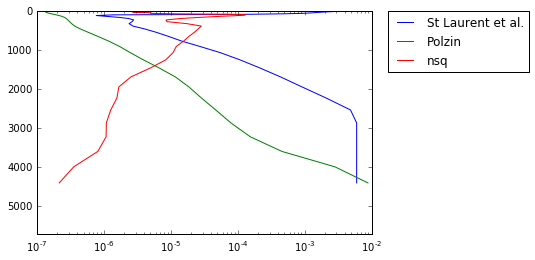

In [29]:
plt.plot(sjtide[1:,200,200],zlevels[1:])
plt.plot(ptide[1:,200,200],zlevels[1:])
plt.plot(pnsq[1:,200,200],zlevels[1:])
# plt.plot(kaptidal_glob,H)
# plt.plot(kap2tidal_glob,H)
# plt.title('Domain Average '+r'$\kappa$')
plt.legend([ 'St Laurent et al.', 'Polzin','nsq'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
# #ax.set_title('Turbulent Dissipation Rate',depth[40])
# plt.xlabel(r'$\kappa$'+' ('+r'$\frac{m^2}{s}$'+')')
# plt.ylabel('Depth')
# plt.grid()
# #plt.xlim([10**-5,10**-4])
plt.ylim(H[-1],H[0])

In [24]:
E = ma.array(nc.Dataset('/mnt/storage0/jacquielee/data/E_climatology.nc').variables['E'],mask = (mask[0,:,:]-1)*-1)

In [48]:
print(E[410,45])
print(E[700,200])
import gsw

0.00014717546779
6.39051859717e-13


In [11]:
eps_p = (ptide*pnsq)/0.2
eps_sj = (sjtide*pnsq)/0.2

In [69]:
ma.mean(sjnsq)

nan

In [70]:
F_zp = eps_p*(1024.0/9.81)*(1.0/E)
F_zslj = eps_sj*(1024.0/9.81)*(1.0/E)

In [71]:
F_zparctic = ma.mean(ma.mean(F_zp[:,500:,:],1),1)
F_zsljarctic = ma.mean(ma.mean(F_zslj[:,500:,:],1),1)
F_zpatlantic = ma.mean(ma.mean(F_zp[:,:400,:],1),1)
F_zsljatlantic = ma.mean(ma.mean(F_zslj[:,:400,:],1),1)

In [43]:
#pnsq_avg = ma.mean(ma.mean(cnsq[:,:300,:],1),1)

In [44]:
#F_zslj = (np.exp(-((zlevels[-1]+(zlevels[:]*-1))/500)))/(500*(1-np.exp(-1*zlevels[-1]/500)))

In [38]:
#calc for 600,320
# zstar_p = (0.06970)*(0.00096**2)*((0.0043126)/(100*0.00209439*pnsq_avg[:]*np.average(pnsq_avg[:])))
# zstar = (1/np.average(pnsq_avg[:])*(0.00958*gsw.p_from_z(zlevels[:],lat[200,320])))

In [39]:
#f_zp = (1/(1+(zstar/zstar_p))**2)*(pnsq_avg[:]/np.average(pnsq_avg[:]))*((1/zlevels[:])+(1/zstar_p))

In [125]:
# one = (1/(1+(zstar/zstar_p))**2)
# two = (pnsq[:47,600,320]/np.average(pnsq[:47,600,320]))
# three = ((1/zlevels[:47])+(1/zstar_p))

ValueError: operands could not be broadcast together with shapes (0,) (47,) 

In [129]:
print(one)

[]


In [12]:
# Original author: Thomas Haslwanter

import numpy as np
import matplotlib.pyplot as plt
import pandas

# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm


##############################################################################
# Multilinear regression model, calculating fit, P-values, confidence
# intervals etc.

# We want to look at how buoyancy frequency, baroclinic energy impact 
# the tidal mixing values

# Convert the data into a Pandas DataFrame to use the formulas framework
# in statsmodels

# First we need to flatten the data: it's 2D layout is not relevent.
X = sjtide.flatten()
Y = cnsq.flatten()
#Z = Z.flatten()

data = pandas.DataFrame({'x': X, 'y': Y})

# Fit the model
model = ols("x ~ y", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# should be array([-4.99754526,  3.00250049, -0.50514907])
# Original author: Thomas Haslwanter

import numpy as np
import matplotlib.pyplot as plt
import pandas

# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

##############################################################################
# Multilinear regression model, calculating fit, P-values, confidence
# intervals etc.
# We want to look at the internal tide mixing values relate to some parameters
# such as N^2, E, Water column depth, and latitude
# Convert the data into a Pandas DataFrame to use the formulas framework
# in statsmodels

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                 1.134e+05
Date:                Sun, 17 Sep 2017   Prob (F-statistic):               0.00
Time:                        22:06:49   Log-Likelihood:             3.4513e+07
No. Observations:             7242843   AIC:                        -6.903e+07
Df Residuals:                 7242841   BIC:                        -6.903e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0012   8.19e-07   1468.233      0.0